In [1]:
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
from pylab import *

rcParams['font.size']=16
rcParams['figure.facecolor']='white'

from Tau_Exit_Simulator import Tau_Exit_Simulator

TES = Tau_Exit_Simulator('./0.0km_PeV_mtns_midCS_stdEL/LUT_3e+14_eV.npz')

[10000.         22263.4086354  44526.74945259 66789.95463359
 89052.95636079] [5.5e-07 4.9e-07 5.7e-07 6.3e-07 5.0e-07]
5.48e-07


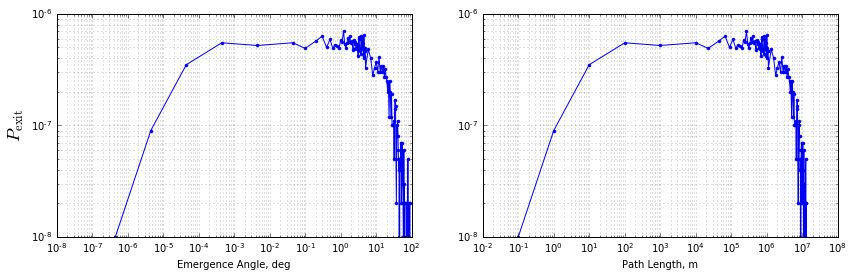

In [2]:
#print TES.th_exit
figure(figsize=(14,4))
subplot(121)
loglog(90.0-TES.th_exit, TES.P_exit, '.-')
grid(True, which='both', alpha=0.5)
xlabel('Emergence Angle, deg')
ylabel(r'$P_\mathrm{exit}$', fontsize=18)
subplot(122)
loglog(TES.pathlength_m, TES.P_exit, '.-')
grid(True, which='both', alpha=0.5)
xlabel('Path Length, m')
print TES.pathlength_m[7:12], TES.P_exit[7:12]
print np.mean(TES.P_exit[7:12])


1000.0
6
TES.pathlength_m[k] 1000.0
TES.P_exit[k] 5.2e-07

7
TES.pathlength_m[k] 10000.000000004424
TES.P_exit[k] 5.5e-07

TES.P_exit_pathlength(pl_avg) 5.350000000000001e-07


Text(0,0.5,'$P(<E_\\tau)$')

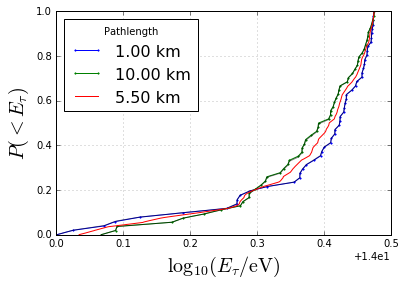

In [4]:
figure()
#for pl in 10**np.arange(-2., 5., 1.):
for pl in [1.e3]:
    print pl
    idx = np.argmin(np.abs(TES.pathlength_m-pl))
    pl_avg = (TES.pathlength_m[idx] + TES.pathlength_m[idx+1])/2.
    for k in [idx, idx+1]:
        print k
        u = TES.get_unit_interval(TES.data_array[k])

        plot(TES.data_array[k], u, '.-', ms=3, label='%1.2f km'%(TES.pathlength_m[k]*1.e-3))
        print 'TES.pathlength_m[k]', TES.pathlength_m[k]
        print 'TES.P_exit[k]', TES.P_exit[k]
        print ''
        #print TES.data_array[k][len(TES.data_array[k])//2-1]
        #print TES.data_array[k][len(TES.data_array[k])//2] 
        #print TES.data_array[k][len(TES.data_array[k])//2+1]
        #print 'N', len(TES.data_array[k])
        vals = []
        u1 = np.random.uniform(0., 1., 100000)
        #u1 = u.copy()
        for i in range(len(u1)):
            vals.append(TES.sample_array_energies(u1[i], k))
            '''
            print i, 
            print u1[i]*float(len(TES.data_array[k])-1),
            print u1[i], 
            print vals[i], 
            print u[i]*float(len(TES.data_array[k])-1),
            print u[i], 
            print TES.data_array[k][i]
            '''
        u2 = TES.get_unit_interval(vals)
        plot(np.sort(vals), u2, 'k-', lw=1, ms=4, alpha=0.5)
        #print np.max(np.abs(vals - TES.data_array[k]))
#pl_val = 1.01e6
vals = []
#u1 = u.copy()
print 'TES.P_exit_pathlength(pl_avg)', TES.P_exit_pathlength(pl_avg)
for i in range(len(u1)):
    vals.append(TES.sample_energies_pathlength(pl_avg))
    '''
    print i, 
    print u1[i]*float(len(TES.data_array[k])-1),
    print u1[i], 
    print vals[i], 
    print u[i]*float(len(TES.data_array[k])-1),
    print u[i], 
    print TES.data_array[k][i]
    '''
u3 = TES.get_unit_interval(vals)
plot(np.sort(vals), u3, 'r-', lw=1, ms=2, label='%1.2f km'%(pl_avg*1.e-3))
legend(loc=2, fontsize=16, title='Pathlength')
grid(True, which='both', alpha=0.5)
xlabel(r'$\log_{10}(E_\tau/\mathrm{eV})$', fontsize=20)
ylabel(r'$P(<E_\tau)$', fontsize=20)

TES.th_exit[k] 89.00000000000006
TES.P_exit[k] 5.8e-07
TES.th_exit[k] 88.90000000000006
TES.P_exit[k] 5.6e-07
th_avg 88.95000000000006
TES.P_exit_th_exit(th_avg) 5.70000000000003e-07


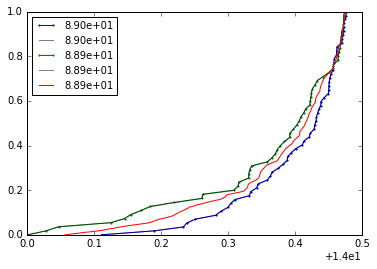

In [15]:
figure()
#for pl in 10**np.arange(-2., 5., 1.):
for th in [89.]:
    idx = np.argmin(np.abs(TES.th_exit-th))
    th_avg = (TES.th_exit[idx] + TES.th_exit[idx+1])/2.
    for k in [idx, idx+1]:

        u = TES.get_unit_interval(TES.data_array[k])
        
        plot(TES.data_array[k], u, '.-', ms=3, label='%1.2e'%TES.th_exit[k])
        
        print 'TES.th_exit[k]', TES.th_exit[k]
        print 'TES.P_exit[k]', TES.P_exit[k]
        #print TES.data_array[k][len(TES.data_array[k])//2-1]
        #print TES.data_array[k][len(TES.data_array[k])//2] 
        #print TES.data_array[k][len(TES.data_array[k])//2+1]
        #print 'N', len(TES.data_array[k])
        vals = []
        u1 = np.random.uniform(0., 1., 100000)
        #u1 = u.copy()
        for i in range(len(u1)):
            # angles corresponding to the energies
            vals.append(TES.sample_array_energies(u1[i], k))
            '''
            print i, 
            print u1[i]*float(len(TES.data_array[k])-1),
            print u1[i], 
            print vals[i], 
            print u[i]*float(len(TES.data_array[k])-1),
            print u[i], 
            print TES.data_array[k][i]
            '''
        u2 = TES.get_unit_interval(vals)
        plot(np.sort(vals), u2, 'k-', lw=1, ms=4, alpha=0.5, label='%1.2e'%TES.th_exit[k])
        #print np.max(np.abs(vals - TES.data_array[k]))
#pl_val = 1.01e6
vals = []
#u1 = u.copy()
print 'th_avg', th_avg
print 'TES.P_exit_th_exit(th_avg)', TES.P_exit_th_exit(th_avg)

for i in range(10000):
    vals.append(TES.sample_energies_th_exit(th_avg))
    '''
    print i, 
    print u1[i]*float(len(TES.data_array[k])-1),
    print u1[i], 
    print vals[i], 
    print u[i]*float(len(TES.data_array[k])-1),
    print u[i], 
    print TES.data_array[k][i]
    '''
u3 = TES.get_unit_interval(vals)
plot(np.sort(vals), u3, 'r-', lw=1, ms=2, label='%1.2e'%TES.th_exit[k])
legend(loc=0, fontsize=10)

[  7.42742665  19.7188573   44.12482295 103.75548178 213.75546777
 437.12217972]
[0.13463613 0.05071288 0.02266298 0.00963804 0.00467824 0.00228769]
[7.42742665e-08 1.97188573e-07 4.41248229e-07 1.03755482e-06
 2.13755468e-06 4.37122180e-06]


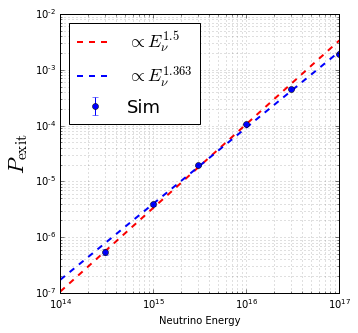

In [6]:
energy = np.array([3.e14, 1.e15, 3.e15, 1.e16, 3.e16, 1.e17])
P_exit = np.array([5.51666666667e-07, 3.88833333333e-06, 1.947e-05, 0.000107652, 0.000456914, 0.001910758])

figure(figsize=(5,5))
ax = subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
#plot(energy, P_exit, 'o')
errorbar(energy, P_exit, yerr=P_exit/np.sqrt(P_exit*1.e8), fmt='o', label='Sim')
x = 10**np.arange(np.log10(1.e14), np.log10(1.e17)+0.05, 0.1)
P_0 = 5.51666666667e-07
print np.sqrt(P_exit*1.e8)
print 1./np.sqrt(P_exit*1.e8)
print P_exit/np.sqrt(P_exit*1.e8)
plot(x, P_0 * (x/3.e14)**1.5, 'r--', lw=2, label=r'$\propto E_\nu^{1.5}$')
plot(x, 1.4*P_0 * (x/3.e14)**1.363, 'b--', lw=2, label=r'$\propto E_\nu^{1.363}$')
xlabel('Neutrino Energy')
ylabel('$P_\mathrm{exit}$', fontsize=22)
grid(True, which='both', alpha=0.5)
legend(loc=0, numpoints=1, fontsize=18)

In [16]:
242/4.

60.5

In [17]:
TES1 = Tau_Exit_Simulator('./0.0km_PeV_mtns_midCS_stdEL/LUT_3e+14_eV.npz')
TES2 = Tau_Exit_Simulator('./0.0km_PeV_mtns_midCS_stdEL/LUT_1e+15_eV.npz')
TES3 = Tau_Exit_Simulator('./0.0km_PeV_mtns_midCS_stdEL/LUT_3e+15_eV.npz')
TES4 = Tau_Exit_Simulator('./0.0km_PeV_mtns_midCS_stdEL/LUT_1e+16_eV.npz')
TES5 = Tau_Exit_Simulator('./0.0km_PeV_mtns_midCS_stdEL/LUT_3e+16_eV.npz')
TES6 = Tau_Exit_Simulator('./0.0km_PeV_mtns_midCS_stdEL/LUT_1e+17_eV.npz')


[10000.         22263.4086354  44526.74945259 66789.95463359
 89052.95636079] [5.5e-07 4.9e-07 5.7e-07 6.3e-07 5.0e-07]
5.48e-07


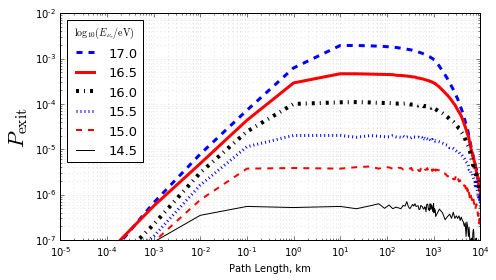

In [18]:
#print TES.th_exit
figure(figsize=(7,4))
subplot(1,1,1)
loglog(TES6.pathlength_m*1.e-3, TES6.P_exit, 'b--',  lw=3, label=r'17.0')
loglog(TES5.pathlength_m*1.e-3, TES5.P_exit, 'r-',  lw=3, label=r'16.5')
loglog(TES4.pathlength_m*1.e-3, TES4.P_exit, 'k-.', lw=4, label=r'16.0')
loglog(TES3.pathlength_m*1.e-3, TES3.P_exit, 'b:',  lw=3, label=r'15.5')
loglog(TES2.pathlength_m*1.e-3, TES2.P_exit, 'r--', lw=2, label=r'15.0')
loglog(TES1.pathlength_m*1.e-3, TES1.P_exit, 'k-',  lw=1, label=r'14.5')
grid(True, which='both', alpha=0.2)
xlabel('Path Length, km')
ylim(1.e-7, 1.e-2)
xlim(1.e-5, 1.e4)
ylabel('$P_\mathrm{exit}$', fontsize=22)
print TES.pathlength_m[7:12], TES.P_exit[7:12]
print np.mean(TES.P_exit[7:12])
tight_layout()
legend(loc=0, fontsize=13, title=r'$\log_{10}(E_{\nu_\tau}/\mathrm{eV})$')
savefig('P_exit_PL.pdf')



17.0 0.1838002046000534
16.5 0.14654919838518193
16.0 0.1574696192557947
15.5 0.14299793395425128
15.0 0.14299793395425128
14.5 0.08084676602146552
TES1.th_exit[k] 89.00000000000006
TES1.P_exit[k] 5.8e-07


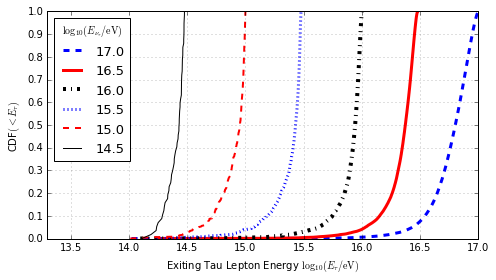

In [19]:
figure(figsize=(7,4))
#for pl in 10**np.arange(-2., 5., 1.):
for pl in [200.e3]:
    idx1 = np.argmin(np.abs(TES1.pathlength_m-pl))
    idx2 = np.argmin(np.abs(TES2.pathlength_m-pl))
    idx3 = np.argmin(np.abs(TES3.pathlength_m-pl))
    idx4 = np.argmin(np.abs(TES4.pathlength_m-pl))
    idx5 = np.argmin(np.abs(TES5.pathlength_m-pl))
    idx6 = np.argmin(np.abs(TES6.pathlength_m-pl))
    for k in [idx]:
        u1 = TES1.get_unit_interval(TES1.data_array[k])
        u2 = TES2.get_unit_interval(TES2.data_array[k])
        u3 = TES3.get_unit_interval(TES3.data_array[k])
        u4 = TES4.get_unit_interval(TES4.data_array[k])
        u5 = TES5.get_unit_interval(TES5.data_array[k])
        u6 = TES6.get_unit_interval(TES6.data_array[k])
        plot(TES6.data_array[k], u6, 'b--',  lw=3, label=r'17.0')
        plot(TES5.data_array[k], u5, 'r-',  lw=3, label=r'16.5')
        plot(TES4.data_array[k], u4, 'k-.', lw=4, label=r'16.0')
        plot(TES3.data_array[k], u3, 'b:',  lw=3, label=r'15.5')
        plot(TES2.data_array[k], u2, 'r--', lw=2, label=r'15.0')
        plot(TES1.data_array[k], u1, 'k-',  lw=1, label=r'14.5')
        print '17.0',np.std(TES6.data_array[k])
        print '16.5',np.std(TES4.data_array[k])
        print '16.0',np.std(TES3.data_array[k])
        print '15.5',np.std(TES2.data_array[k])
        print '15.0',np.std(TES2.data_array[k])
        print '14.5',np.std(TES1.data_array[k])
        print 'TES1.th_exit[k]', TES1.th_exit[k]
        print 'TES1.P_exit[k]', TES1.P_exit[k]
grid(True, which='both', alpha=0.5)
yticks(np.arange(0., 1.05, 0.1))
xlim(13.3,17.)
legend(loc=0, fontsize=13, title=r'$\log_{10}(E_{\nu_\tau}/\mathrm{eV})$')
xlabel(r'Exiting Tau Lepton Energy $\log_{10}(E_\tau / \mathrm{eV})$')
ylabel(r'CDF$(<E_\tau)$')
tight_layout()
savefig('E_tau_cumu.pdf')

0.7943282347241489
0.8317637711025518
0.9120108393557996
0.9120108393558221
0.9549925860213666
0.9120108393558668
17.0 0.1838002046000534 0.6327322925944716 0.5792022613075062
16.5 0.14654919838518193 0.2763503379381118 0.24687609524898296
16.0 0.1574696192557947 0.26908221871701316 0.23406137943350444
15.5 0.14299793395425128 0.28307075288397904 0.2460068467995928
15.0 0.14299793395425128 0.8951483180920508 0.7779419558828172
14.5 0.08084676602146552 0.8520106040661835 0.7895302843879788
TES1.th_exit[k] 89.00000000000006
TES1.P_exit[k] 5.8e-07


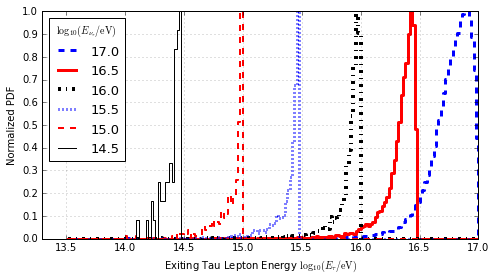

In [20]:
figure(figsize=(7,4))
#for pl in 10**np.arange(-2., 5., 1.):
bins = np.arange(13.5, 17.1, 0.02)
for pl in [200.e3]:
    idx1 = np.argmin(np.abs(TES1.pathlength_m-pl))
    idx2 = np.argmin(np.abs(TES2.pathlength_m-pl))
    idx3 = np.argmin(np.abs(TES3.pathlength_m-pl))
    idx4 = np.argmin(np.abs(TES4.pathlength_m-pl))
    idx5 = np.argmin(np.abs(TES5.pathlength_m-pl))
    idx6 = np.argmin(np.abs(TES6.pathlength_m-pl))
    for k in [idx]:
        u1 = TES1.get_unit_interval(TES1.data_array[k])
        u2 = TES2.get_unit_interval(TES2.data_array[k])
        u3 = TES3.get_unit_interval(TES3.data_array[k])
        u4 = TES4.get_unit_interval(TES4.data_array[k])
        u5 = TES5.get_unit_interval(TES5.data_array[k])
        u6 = TES6.get_unit_interval(TES6.data_array[k])
        '''
        plot(TES6.data_array[k], u6, 'b--',  lw=3, label=r'17.0')
        plot(TES5.data_array[k], u5, 'r-',  lw=3, label=r'16.5')
        plot(TES4.data_array[k], u4, 'k-.', lw=4, label=r'16.0')
        plot(TES3.data_array[k], u3, 'b:',  lw=3, label=r'15.5')
        plot(TES2.data_array[k], u2, 'r--', lw=2, label=r'15.0')
        plot(TES1.data_array[k], u1, 'k-',  lw=1, label=r'14.5')
        '''
        h,b = np.histogram(TES6.data_array[k], bins=bins)
        plot(b[1:], h.astype(float)/float(np.max(h)), 'b--', drawstyle='steps', lw=3, label=r'17.0')
        print 10**(b[np.argmax(h)]-17.0)

        h,b = np.histogram(TES5.data_array[k], bins=bins)
        plot(b[1:], h.astype(float)/float(np.max(h)), 'r-', drawstyle='steps',  lw=3, label=r'16.5')
        print 10**(b[np.argmax(h)]-16.5)
        
        h,b = np.histogram(TES4.data_array[k], bins=bins)
        plot(b[1:], h.astype(float)/float(np.max(h)), 'k-.', drawstyle='steps', lw=4, label=r'16.0')
        print 10**(b[np.argmax(h)]-16.0)
        
        h,b = np.histogram(TES3.data_array[k], bins=bins)
        plot(b[1:], h.astype(float)/float(np.max(h)), 'b:', drawstyle='steps',  lw=3, label=r'15.5')
        print 10**(b[np.argmax(h)]-15.5)
        
        h,b = np.histogram(TES2.data_array[k], bins=bins)
        plot(b[1:], h.astype(float)/float(np.max(h)), 'r--', drawstyle='steps', lw=2, label=r'15.0')
        print 10**(b[np.argmax(h)]-15.0)
        
        h,b = np.histogram(TES1.data_array[k], bins=bins)
        plot(b[1:], h.astype(float)/float(np.max(h)), 'k-', drawstyle='steps',  lw=1, label=r'14.5')
        print 10**(b[np.argmax(h)]-14.5)
        
        print '17.0',np.std(TES6.data_array[k]),10**(np.median(TES6.data_array[k])-17.0),10**(np.mean(TES6.data_array[k])-17.0)
        print '16.5',np.std(TES4.data_array[k]),10**(np.median(TES4.data_array[k])-16.5),10**(np.mean(TES4.data_array[k])-16.5)
        print '16.0',np.std(TES3.data_array[k]),10**(np.median(TES3.data_array[k])-16.0),10**(np.mean(TES3.data_array[k])-16.0)
        print '15.5',np.std(TES2.data_array[k]),10**(np.median(TES2.data_array[k])-15.5),10**(np.mean(TES2.data_array[k])-15.5)
        print '15.0',np.std(TES2.data_array[k]),10**(np.median(TES2.data_array[k])-15.0),10**(np.mean(TES2.data_array[k])-15.0)
        print '14.5',np.std(TES1.data_array[k]),10**(np.median(TES1.data_array[k])-14.5),10**(np.mean(TES1.data_array[k])-14.5)
        print 'TES1.th_exit[k]', TES1.th_exit[k]
        print 'TES1.P_exit[k]', TES1.P_exit[k]
grid(True, which='both', alpha=0.5)
yticks(np.arange(0., 1.05, 0.1))
xlim(13.3,17.)
legend(loc=0, fontsize=13, title=r'$\log_{10}(E_{\nu_\tau}/\mathrm{eV})$')
xlabel(r'Exiting Tau Lepton Energy $\log_{10}(E_\tau / \mathrm{eV})$')
ylabel(r'Normalized PDF')
tight_layout()
savefig('E_tau_diff.pdf')